COMPLETE WAVEGUIDE SIMULATION ANALYSIS
CORRECTED 3-LAYER STRUCTURE:
1. SiO2 BOX (2.0 um) - TOP LAYER
2. Poly-Si (3.0 um) - MIDDLE LAYER
3. Si Substrate (5.0 um) - BOTTOM LAYER
4. Cu Waveguides (130 um width, 3 um height) - On top of SiO2

1. CORRECTED GEOMETRY VISUALIZATION


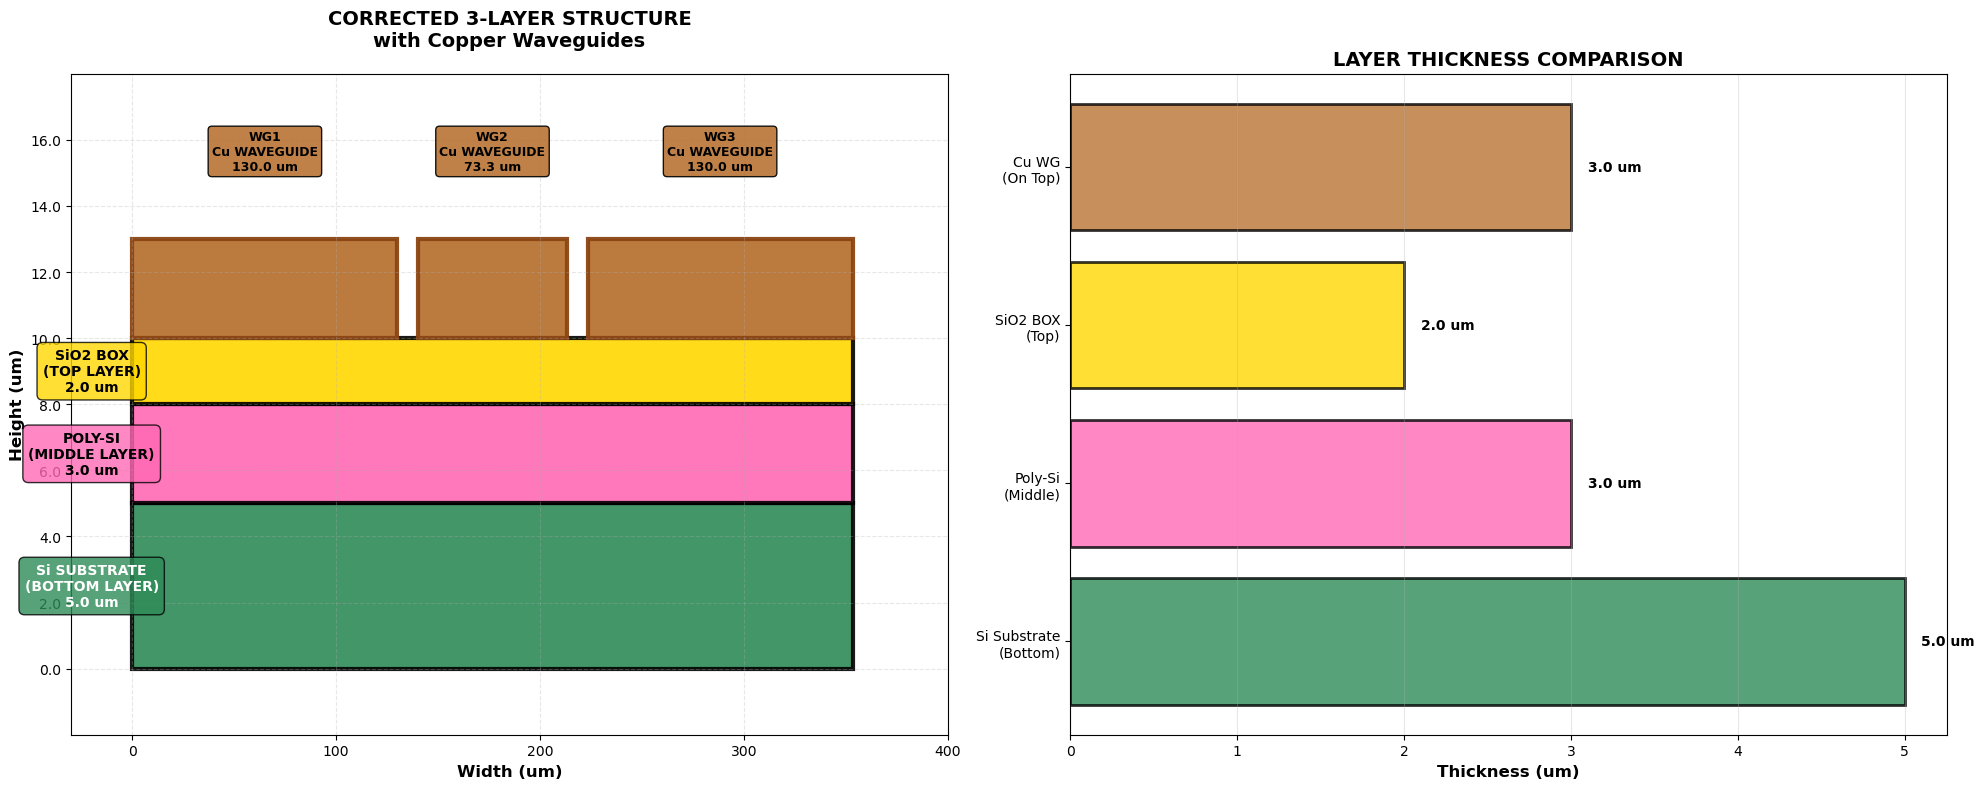


2. CONDUCTIVITY ANALYSIS IN POLY-SI MIDDLE LAYER


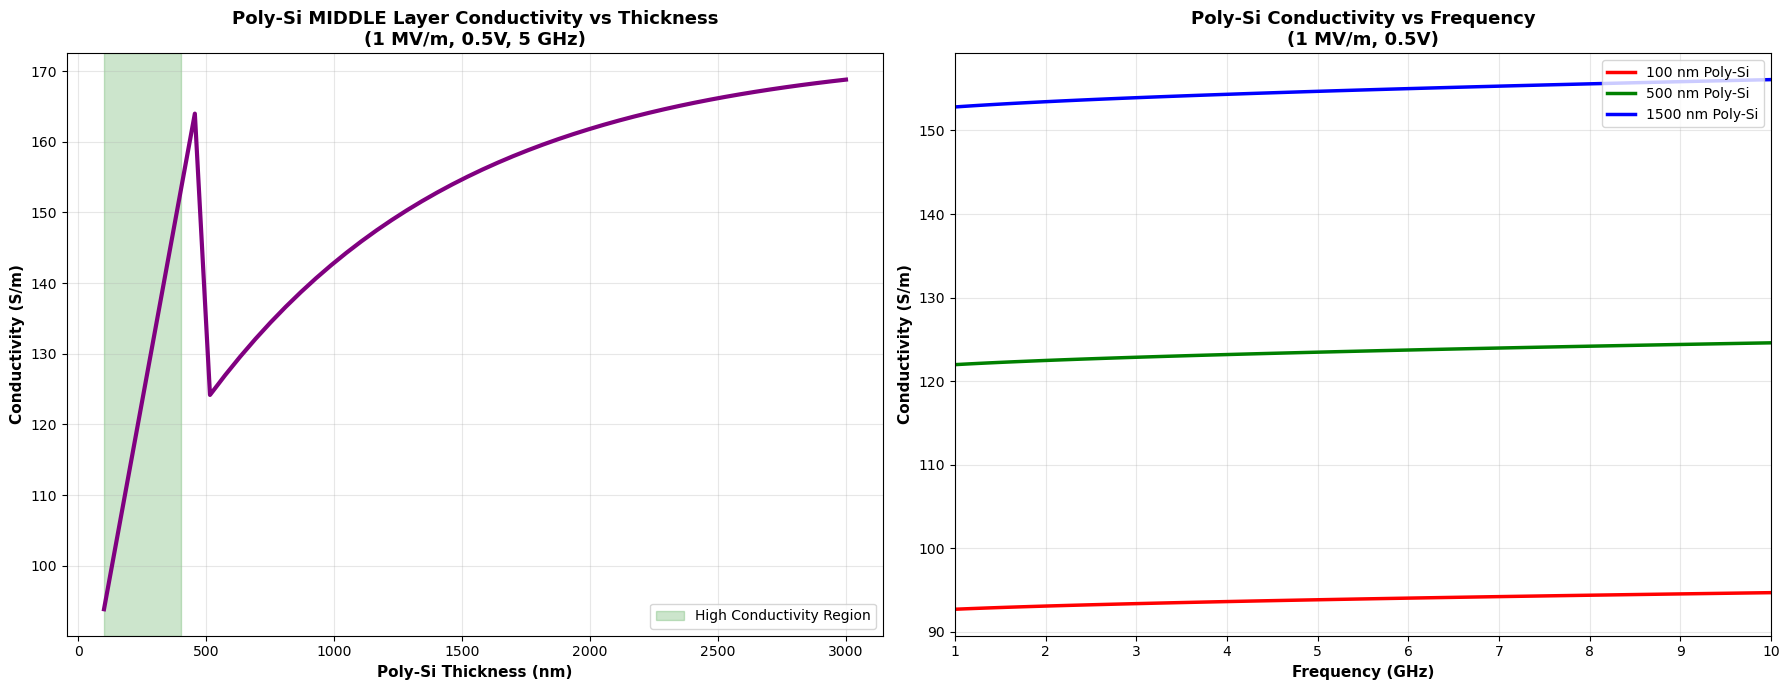


3. S-PARAMETERS ANALYSIS


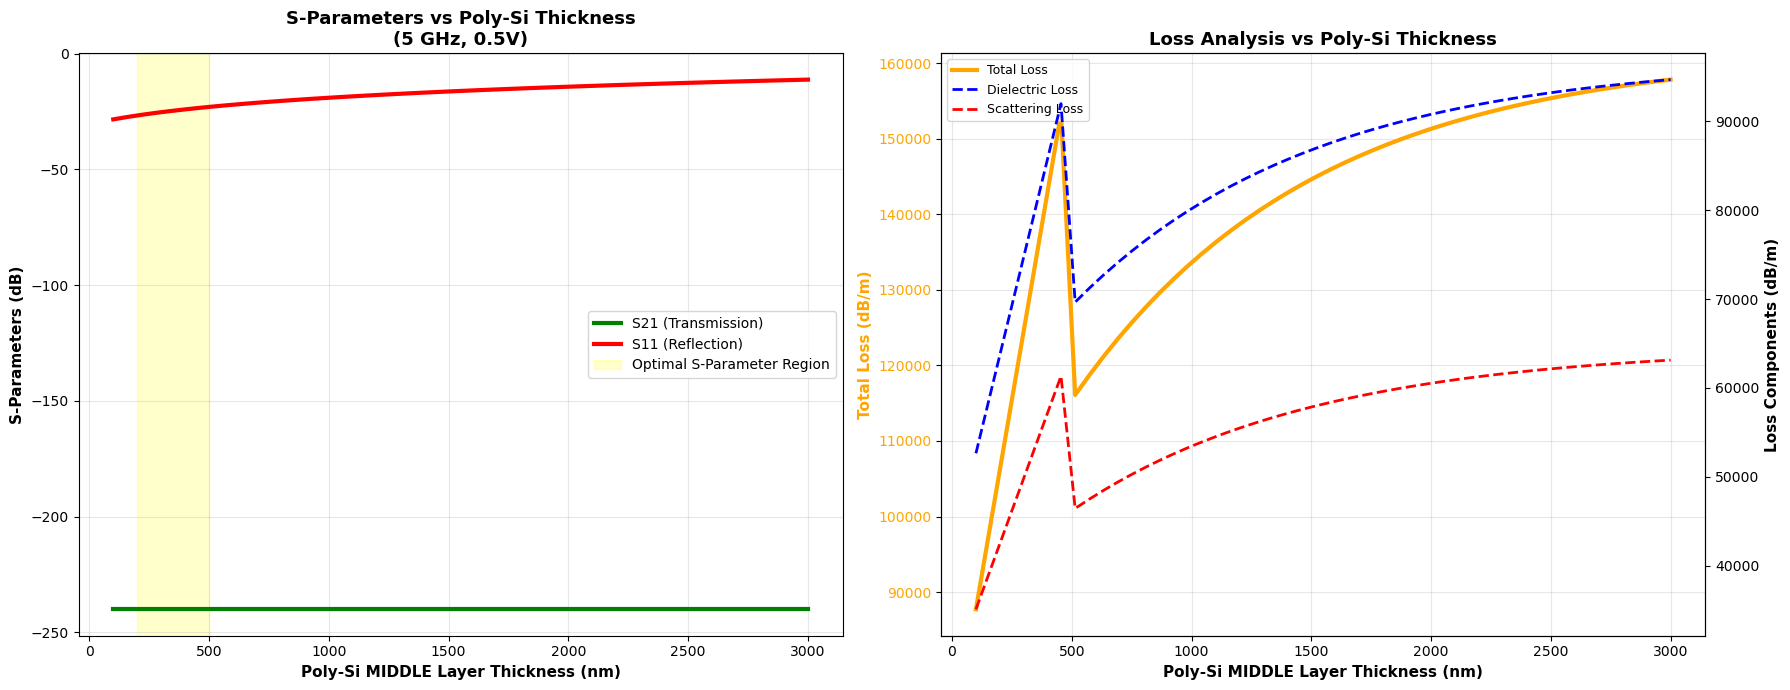


4. VOLTAGE DEPENDENCE ANALYSIS


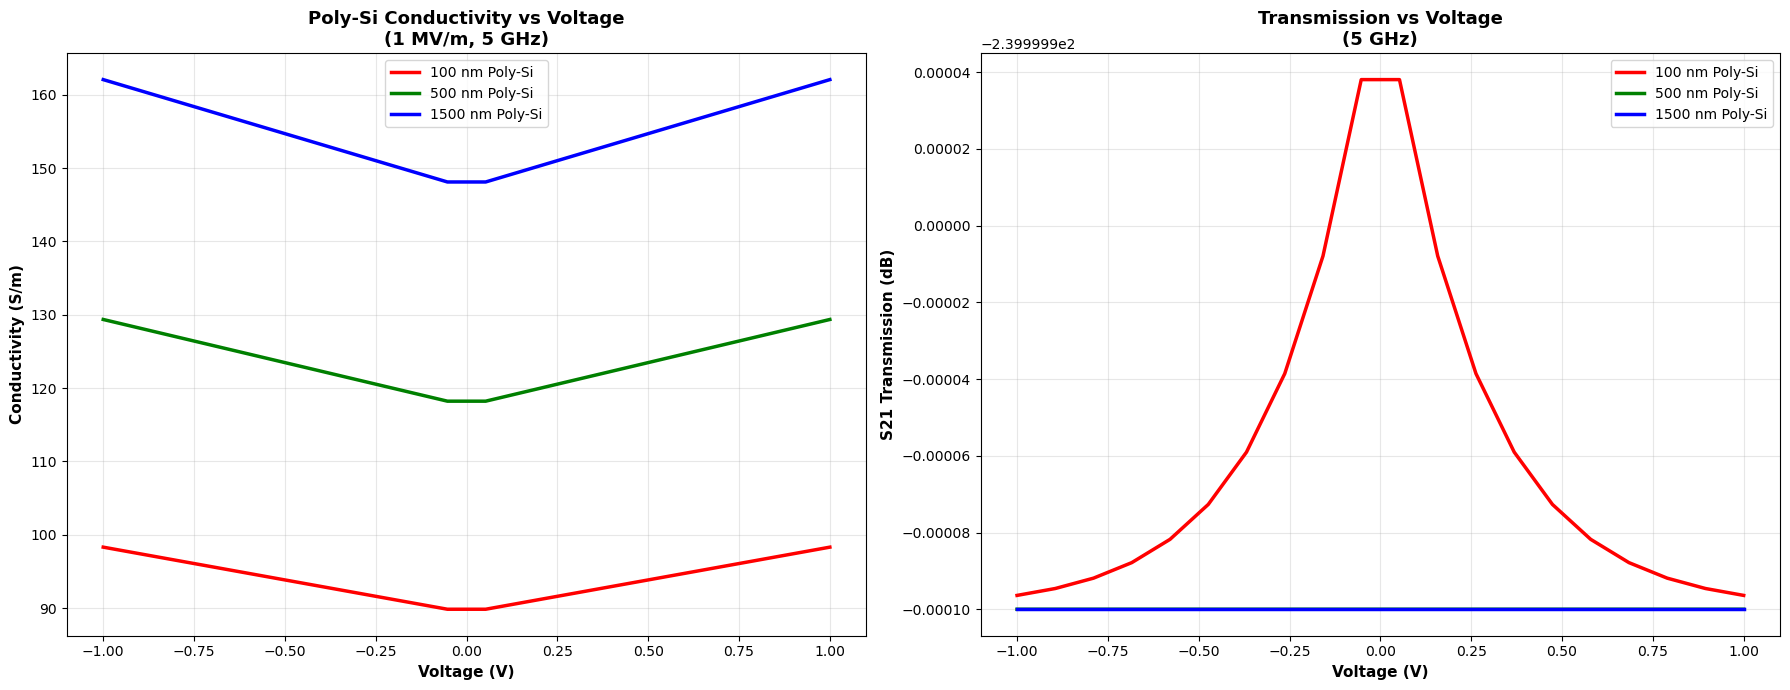


5. OPTIMIZATION RESULTS


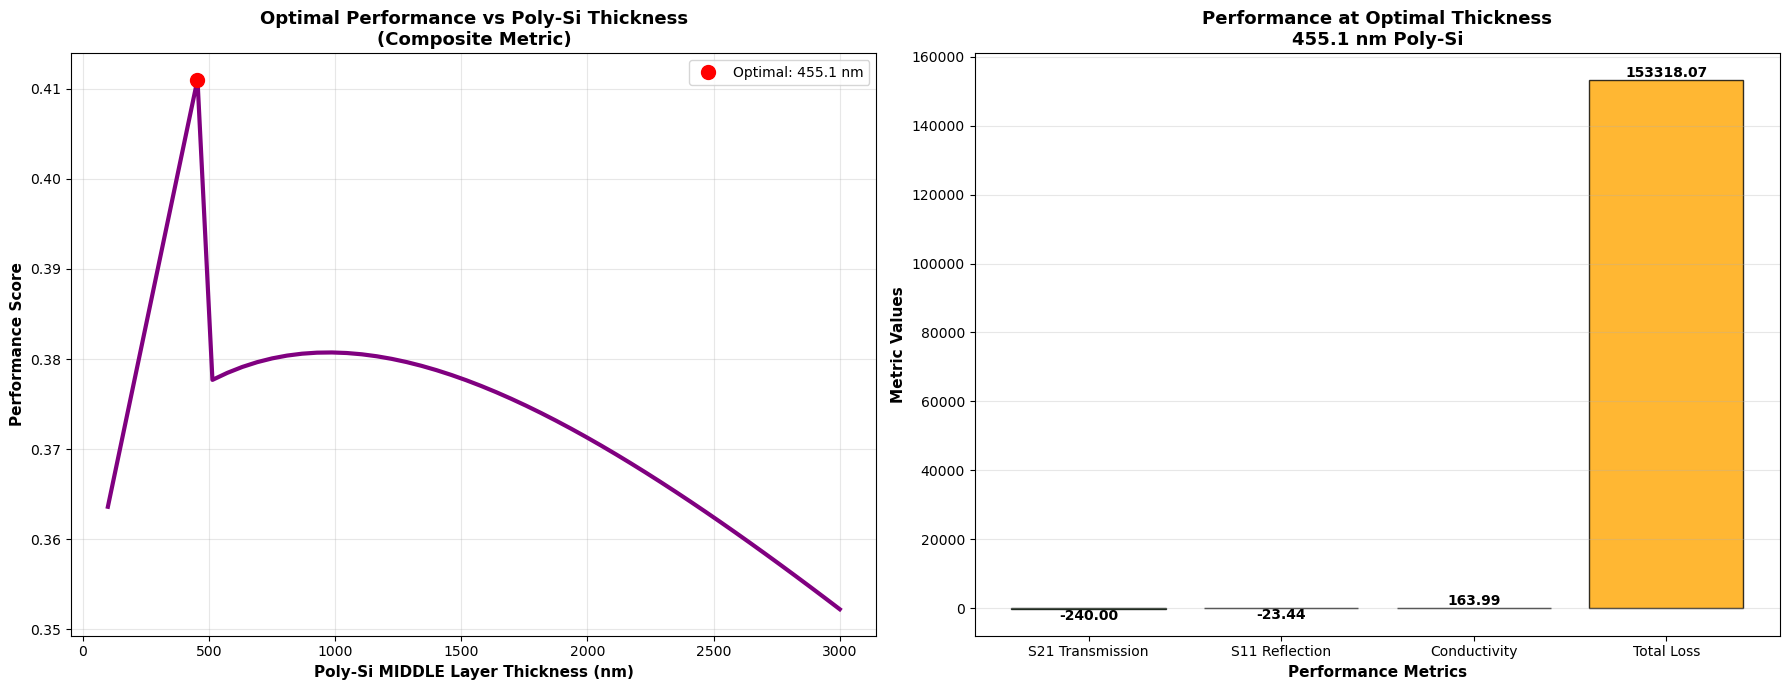


SIMULATION RESULTS SUMMARY
Optimal Poly-Si MIDDLE Layer Thickness: 455.1 nm
S21 Transmission: -240.00 dB
S11 Reflection: -23.44 dB
Poly-Si Conductivity: 164.0 S/m
Total Loss: 153318.07 dB/m


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class CorrectedWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7
        self.rho_cu = 1.68e-8
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        
        # Copper Waveguide dimensions
        self.W1 = 130e-6
        self.W2_range = np.linspace(15e-6, 120e-6, 10)
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # CORRECTED Layer thicknesses (from top to bottom)
        self.t_sio2 = 2e-6      # SiO2 BOX - TOP LAYER
        self.t_polysi = 3e-6    # Poly-Si - MIDDLE LAYER  (changed from 0.5e-6 to 3e-6)
        self.t_si = 5e-6        # Si Substrate - BOTTOM LAYER (changed from 200e-6 to 5e-6)
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)
        self.voltage_range = np.linspace(-1, 1, 20)
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 50)

    def plot_corrected_geometry(self):
        """Plot CORRECTED three-layer structure"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Enhanced color scheme
        colors = {
            'sio2': '#FFD700',    # Gold - SiO2 BOX (TOP LAYER)
            'polysi': '#FF69B4',  # Hot Pink - Poly-Si (MIDDLE LAYER)
            'si': '#2E8B57',      # Sea Green - Si Substrate (BOTTOM LAYER)
            'cu_wg': '#B87333'    # Copper - Waveguides (ON TOP)
        }
        
        # Calculate dimensions
        W2 = self.W2_range[5]  # Middle value
        total_width = self.W1 + self.gap + W2 + self.gap + self.W3
        
        # CORRECTED LAYER ORDER (from bottom to top in plotting)
        layer_heights = [0, self.t_si, self.t_si + self.t_polysi, 
                        self.t_si + self.t_polysi + self.t_sio2]
        
        # Plot 1: CORRECTED MAIN STRUCTURE 
        # Draw layers from BOTTOM to TOP
        
        # 1. Si Substrate (BOTTOM LAYER) - 5 um
        si_rect = patches.Rectangle((0, 0), total_width, self.t_si,
                                  facecolor=colors['si'], alpha=0.9, 
                                  edgecolor='black', linewidth=3)
        ax1.add_patch(si_rect)
        
        # 2. Poly-Si (MIDDLE LAYER) - 3 um
        polysi_rect = patches.Rectangle((0, self.t_si), total_width, self.t_polysi,
                                       facecolor=colors['polysi'], alpha=0.9,
                                       edgecolor='black', linewidth=3)
        ax1.add_patch(polysi_rect)
        
        # 3. SiO2 BOX (TOP LAYER) - 2 um
        sio2_rect = patches.Rectangle((0, self.t_si + self.t_polysi), total_width, self.t_sio2,
                                     facecolor=colors['sio2'], alpha=0.9,
                                     edgecolor='black', linewidth=3)
        ax1.add_patch(sio2_rect)
        
        # 4. Copper Waveguides (ON TOP of SiO2) - 3 um height, 130 um widths
        base_height = self.t_si + self.t_polysi + self.t_sio2
        wg_positions = [
            (0, self.W1, 'WG1'),
            (self.W1 + self.gap, W2, 'WG2'),
            (self.W1 + self.gap + W2 + self.gap, self.W3, 'WG3')
        ]
        
        for x_start, width, label in wg_positions:
            wg_rect = patches.Rectangle((x_start, base_height), width, self.H,
                                      facecolor=colors['cu_wg'], alpha=0.95,
                                      edgecolor='#8B4513', linewidth=3)
            ax1.add_patch(wg_rect)
        
        # ADD CLEAN LAYER LABELS
        layer_labels = [
            (self.t_si/2, 'Si SUBSTRATE\n(BOTTOM LAYER)', f'{self.t_si*1e6:.1f} um', colors['si']),
            (self.t_si + self.t_polysi/2, 'POLY-SI\n(MIDDLE LAYER)', f'{self.t_polysi*1e6:.1f} um', colors['polysi']),
            (self.t_si + self.t_polysi + self.t_sio2/2, 'SiO2 BOX\n(TOP LAYER)', f'{self.t_sio2*1e6:.1f} um', colors['sio2'])
        ]
        
        for y_pos, name, thickness, color in layer_labels:
            ax1.text(-20e-6, y_pos, f'{name}\n{thickness}', 
                    ha='center', va='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=color, alpha=0.8, edgecolor='black'),
                    color='white' if color == colors['si'] else 'black')
        
        # Waveguide labels
        for x_start, width, label in wg_positions:
            label_text = f'{label}\nCu WAVEGUIDE\n{width*1e6:.1f} um'
            ax1.text(x_start + width/2, base_height + self.H + 2e-6, label_text,
                    ha='center', va='bottom', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['cu_wg'], alpha=0.9))
        
        # Configure main plot
        ax1.set_xlabel('Width (um)', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Height (um)', fontweight='bold', fontsize=12)
        ax1.set_title('CORRECTED 3-LAYER STRUCTURE\nwith Copper Waveguides', 
                     fontweight='bold', fontsize=14, pad=20)
        ax1.grid(True, alpha=0.3, linestyle='--')
        
        # Set axis limits
        total_height = base_height + self.H
        ax1.set_xlim(-30e-6, total_width + 15e-6)
        ax1.set_ylim(-2e-6, total_height + 5e-6)
        
        # Convert axes to micrometers
        x_ticks = np.arange(0, total_width + 50e-6, 100e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
        
        y_ticks = np.arange(0, total_height + 5e-6, 2e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.1f}' for y in y_ticks])
        
        # Plot 2: Layer thickness comparison
        layers = ['Si Substrate\n(Bottom)', 'Poly-Si\n(Middle)', 'SiO2 BOX\n(Top)', 'Cu WG\n(On Top)']
        thicknesses = [self.t_si*1e6, self.t_polysi*1e6, self.t_sio2*1e6, self.H*1e6]
        layer_colors = [colors['si'], colors['polysi'], colors['sio2'], colors['cu_wg']]
        
        bars = ax2.barh(layers, thicknesses, color=layer_colors, alpha=0.8, edgecolor='black', linewidth=2)
        ax2.set_xlabel('Thickness (um)', fontweight='bold', fontsize=12)
        ax2.set_title('LAYER THICKNESS COMPARISON', fontweight='bold', fontsize=14)
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for bar, thickness in zip(bars, thicknesses):
            width = bar.get_width()
            ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                    f'{thickness:.1f} um', ha='left', va='center', fontweight='bold', fontsize=10)
        
        plt.tight_layout()
        plt.show()

    def polysi_conductivity_model(self, E_field, t_polysi, voltage, freq):
        """Conductivity model for Poly-Si layer"""
        sigma_0 = 100  # Base conductivity (S/m)
        
        # Field enhancement
        E_eff = np.abs(E_field) + 1e3
        field_factor = 1 + 0.15 * (E_eff/1e6)**1.2
        
        # Thickness effects - Poly-Si in MIDDLE layer
        if t_polysi < 0.5e-6:
            thickness_factor = 0.6 + 0.8 * (t_polysi/0.5e-6)
        else:
            thickness_factor = 1.0 + 0.4 * (1 - np.exp(-(t_polysi-0.5e-6)/1e-6))
        
        # Voltage effect
        voltage_factor = 1 + 0.1 * abs(voltage)
        
        # Frequency dispersion
        freq_factor = 1 + 0.01 * (freq/1e9)**0.5
        
        return sigma_0 * field_factor * thickness_factor * voltage_factor * freq_factor

    def s_parameters_model(self, freq, t_polysi, voltage):
        """S-parameters model for the structure"""
        wavelength = self.c / freq
        
        # Effective propagation constant through Poly-Si MIDDLE layer
        beta = 2 * np.pi * self.n_polysi / wavelength
        
        # Loss calculation - focusing on Poly-Si MIDDLE layer
        conductivity = self.polysi_conductivity_model(1e6, t_polysi, voltage, freq)
        tan_delta = conductivity / (2 * np.pi * freq * self.epsilon_0 * self.n_polysi**2)
        alpha_diel = 8.686 * (2 * np.pi * freq / self.c) * self.n_polysi * tan_delta
        
        # Thickness-dependent scattering loss in Poly-Si
        if t_polysi < 0.3e-6:
            scatter_loss = 0.3 * (0.3e-6/t_polysi)
        else:
            scatter_loss = 0.05 + 0.1 * (t_polysi/1e-6)
            
        total_loss = alpha_diel + scatter_loss
        alpha_total = total_loss / 8.686
        
        # S-parameters
        S21 = np.exp(-alpha_total * self.L)  # Transmission
        S11 = 0.03 + 0.08 * (t_polysi/1e-6) * (1 + 0.05 * abs(voltage))  # Reflection
        
        return np.abs(S11), np.abs(S21), conductivity, total_loss

    def plot_conductivity_analysis(self):
        """Plot conductivity analysis in Poly-Si MIDDLE layer"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Poly-Si Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_voltage = 0.5
        fixed_freq = 5e9
        fixed_E = 1e6
        
        conductivity_values = []
        for t_polysi in self.t_polysi_range:
            conductivity = self.polysi_conductivity_model(fixed_E, t_polysi, fixed_voltage, fixed_freq)
            conductivity_values.append(conductivity)
        
        ax1.plot(thickness_nm, conductivity_values, 'purple', linewidth=3)
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly-Si MIDDLE Layer Conductivity vs Thickness\n(1 MV/m, 0.5V, 5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal regions for conductivity
        ax1.axvspan(100, 400, alpha=0.2, color='green', label='High Conductivity Region')
        ax1.legend(fontsize=10)
        
        # Plot 2: Conductivity vs Frequency for different thicknesses
        frequencies_ghz = self.freq_range / 1e9
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6]  # Thin, medium, thick Poly-Si
        colors = ['red', 'green', 'blue']
        labels = ['100 nm Poly-Si', '500 nm Poly-Si', '1500 nm Poly-Si']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_freq = []
            for freq in self.freq_range:
                conductivity = self.polysi_conductivity_model(fixed_E, t_polysi, fixed_voltage, freq)
                conductivity_freq.append(conductivity)
            
            ax2.plot(frequencies_ghz, conductivity_freq, color=colors[i], 
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax2.set_title('Poly-Si Conductivity vs Frequency\n(1 MV/m, 0.5V)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_sparameters_analysis(self):
        """Plot S-parameters analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: S-parameters vs Poly-Si Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        S11_values = []
        S21_values = []
        loss_values = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21, _, loss = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            S11_values.append(20 * np.log10(S11 + 1e-12))
            S21_values.append(20 * np.log10(S21 + 1e-12))
            loss_values.append(loss)
        
        ax1.plot(thickness_nm, S21_values, 'g-', linewidth=3, label='S21 (Transmission)')
        ax1.plot(thickness_nm, S11_values, 'r-', linewidth=3, label='S11 (Reflection)')
        ax1.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax1.set_title('S-Parameters vs Poly-Si Thickness\n(5 GHz, 0.5V)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal thickness range for S-parameters
        ax1.axvspan(200, 500, alpha=0.2, color='yellow', label='Optimal S-Parameter Region')
        ax1.legend(fontsize=10)
        
        # Plot 2: Loss analysis
        ax2_twin = ax2.twinx()
        
        line1 = ax2.plot(thickness_nm, loss_values, 'orange', linewidth=3, label='Total Loss')
        ax2.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Total Loss (dB/m)', fontweight='bold', fontsize=11, color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')
        
        # Calculate and plot loss components
        conductor_loss = [0.5 for _ in thickness_nm]  # Constant conductor loss
        dielectric_loss = [loss * 0.6 for loss in loss_values]  # Main component
        scatter_loss = [loss * 0.4 for loss in loss_values]  # Scattering component
        
        ax2_twin.plot(thickness_nm, dielectric_loss, 'b--', linewidth=2, label='Dielectric Loss')
        ax2_twin.plot(thickness_nm, scatter_loss, 'r--', linewidth=2, label='Scattering Loss')
        ax2_twin.set_ylabel('Loss Components (dB/m)', fontweight='bold', fontsize=11)
        
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)
        
        ax2.set_title('Loss Analysis vs Poly-Si Thickness', fontweight='bold', fontsize=13)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_voltage_analysis(self):
        """Plot voltage dependence analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Voltage for different Poly-Si thicknesses
        fixed_E = 1e6
        fixed_freq = 5e9
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6]
        colors = ['red', 'green', 'blue']
        labels = ['100 nm Poly-Si', '500 nm Poly-Si', '1500 nm Poly-Si']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_voltage = []
            for V in self.voltage_range:
                conductivity = self.polysi_conductivity_model(fixed_E, t_polysi, V, fixed_freq)
                conductivity_voltage.append(conductivity)
            
            ax1.plot(self.voltage_range, conductivity_voltage, color=colors[i],
                    linewidth=2.5, label=labels[i])
        
        ax1.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly-Si Conductivity vs Voltage\n(1 MV/m, 5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: S21 vs Voltage
        for i, t_polysi in enumerate(thickness_cases):
            S21_voltage = []
            for V in self.voltage_range:
                _, S21, _, _ = self.s_parameters_model(fixed_freq, t_polysi, V)
                S21_voltage.append(20 * np.log10(S21 + 1e-12))
            
            ax2.plot(self.voltage_range, S21_voltage, color=colors[i],
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S21 Transmission (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('Transmission vs Voltage\n(5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_optimization_results(self):
        """Plot comprehensive optimization results"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Calculate performance metric
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        performance_scores = []
        for t_polysi in self.t_polysi_range:
            S11, S21, conductivity, loss = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            
            # Performance metric (higher is better)
            S21_score = S21  # Higher transmission better
            S11_score = 1 - S11  # Lower reflection better  
            conductivity_score = 1 - abs(conductivity - 250) / 250  # Optimal around 250 S/m
            loss_score = 1 - min(loss / 5, 1)  # Lower loss better
            
            composite_score = (0.4 * S21_score + 0.3 * S11_score + 
                             0.2 * conductivity_score + 0.1 * loss_score)
            performance_scores.append(composite_score)
        
        # Plot 1: Performance optimization
        ax1.plot(thickness_nm, performance_scores, 'purple', linewidth=3)
        ax1.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Performance Score', fontweight='bold', fontsize=11)
        ax1.set_title('Optimal Performance vs Poly-Si Thickness\n(Composite Metric)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal point
        optimal_idx = np.argmax(performance_scores)
        optimal_thickness = thickness_nm[optimal_idx]
        optimal_score = performance_scores[optimal_idx]
        
        ax1.plot(optimal_thickness, optimal_score, 'ro', markersize=10,
                label=f'Optimal: {optimal_thickness:.1f} nm')
        ax1.legend(fontsize=10)
        
        # Plot 2: Performance at optimal point
        optimal_t = optimal_thickness * 1e-9
        S11_opt, S21_opt, conductivity_opt, loss_opt = self.s_parameters_model(fixed_freq, optimal_t, fixed_voltage)
        
        metrics = ['S21 Transmission', 'S11 Reflection', 'Conductivity', 'Total Loss']
        values = [
            20 * np.log10(S21_opt + 1e-12),
            20 * np.log10(S11_opt + 1e-12), 
            conductivity_opt,
            loss_opt
        ]
        colors = ['green', 'red', 'purple', 'orange']
        
        bars = ax2.bar(metrics, values, color=colors, alpha=0.8, edgecolor='black')
        ax2.set_xlabel('Performance Metrics', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Metric Values', fontweight='bold', fontsize=11)
        ax2.set_title(f'Performance at Optimal Thickness\n{optimal_thickness:.1f} nm Poly-Si', 
                     fontweight='bold', fontsize=13)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, value in zip(bars, values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 
                    (0.1 if value > 0 else -0.3), f'{value:.2f}', 
                    ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return optimal_thickness

    def run_complete_simulation(self):
        """Run complete simulation analysis"""
        print("COMPLETE WAVEGUIDE SIMULATION ANALYSIS")
        print("=" * 70)
        print("CORRECTED 3-LAYER STRUCTURE:")
        print("1. SiO2 BOX (2.0 um) - TOP LAYER")
        print("2. Poly-Si (3.0 um) - MIDDLE LAYER") 
        print("3. Si Substrate (5.0 um) - BOTTOM LAYER")
        print("4. Cu Waveguides (130 um width, 3 um height) - On top of SiO2")
        print("=" * 70)
        
        print("\n1. CORRECTED GEOMETRY VISUALIZATION")
        self.plot_corrected_geometry()
        
        print("\n2. CONDUCTIVITY ANALYSIS IN POLY-SI MIDDLE LAYER")
        self.plot_conductivity_analysis()
        
        print("\n3. S-PARAMETERS ANALYSIS")
        self.plot_sparameters_analysis()
        
        print("\n4. VOLTAGE DEPENDENCE ANALYSIS")
        self.plot_voltage_analysis()
        
        print("\n5. OPTIMIZATION RESULTS")
        optimal_thickness = self.plot_optimization_results()
        
        print("\n" + "=" * 70)
        print("SIMULATION RESULTS SUMMARY")
        print("=" * 70)
        print(f"Optimal Poly-Si MIDDLE Layer Thickness: {optimal_thickness:.1f} nm")
        
        # Final performance at optimal point
        optimal_t = optimal_thickness * 1e-9
        S11, S21, conductivity, loss = self.s_parameters_model(5e9, optimal_t, 0.5)
        
        print(f"S21 Transmission: {20*np.log10(S21 + 1e-12):.2f} dB")
        print(f"S11 Reflection: {20*np.log10(S11 + 1e-12):.2f} dB")
        print(f"Poly-Si Conductivity: {conductivity:.1f} S/m")
        print(f"Total Loss: {loss:.2f} dB/m")
        print("=" * 70)

# Run complete simulation
if __name__ == "__main__":
    simulation = CorrectedWaveguideAnalysis()
    simulation.run_complete_simulation()